# Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in predictions from models

sotu = pd.read_csv('../data/prediction_data/predictions/sotu.csv')
inaug = pd.read_csv('../data/prediction_data/predictions/inaug.csv')
court = pd.read_csv('../data/prediction_data/predictions/court.csv')
doj = pd.read_csv('../data/prediction_data/predictions/doj.csv')

## State of the Union

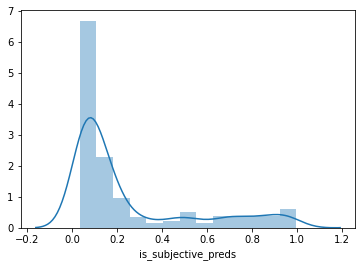

In [3]:
sns.distplot(sotu['is_subjective_preds'])

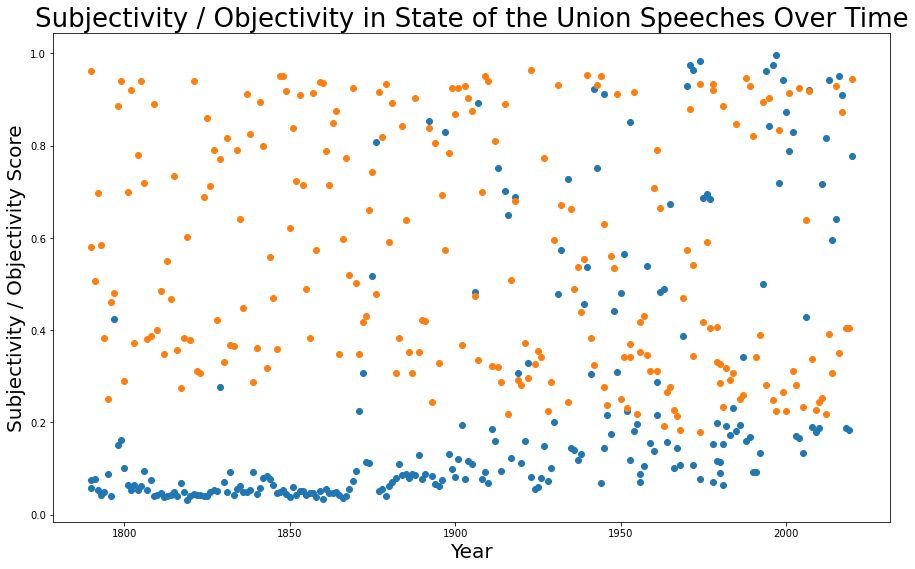

In [4]:
# visualizing predictions data

plt.figure(figsize = (15, 9))
plt.scatter(sotu['Year'], sotu['is_subjective_preds'], label = 'Subjectivity')
plt.scatter(sotu['Year'], sotu['is_positive_preds'], label = 'Positivity')
plt.xlabel('Year', size = 20)
plt.ylabel('Subjectivity / Objectivity Score', size = 20)
plt.title('Subjectivity / Objectivity in State of the Union Speeches Over Time', size = 26)
plt.legend;

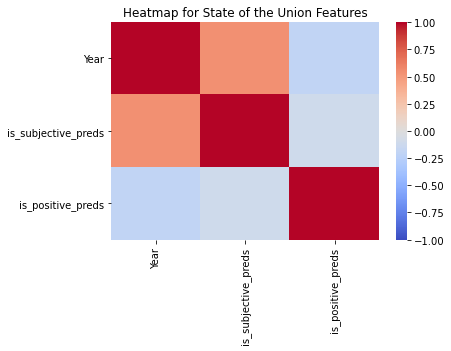

In [5]:
sns.heatmap(sotu.corr(), 
            cmap = 'coolwarm',
           vmin = -1,
           vmax = 1)
plt.title('Heatmap for State of the Union Features');

In [6]:
# Taking mean values grouped by president for analysis

sotu_mean_presidents = sotu.groupby('President').mean().sort_values('Year')
sotu_mean_presidents.head(2)

,Year,is_subjective_preds,is_positive_preds
President,,,
George Washington,1792.625,0.060610,0.55348
John Adams,1798.500,0.209086,0.64945


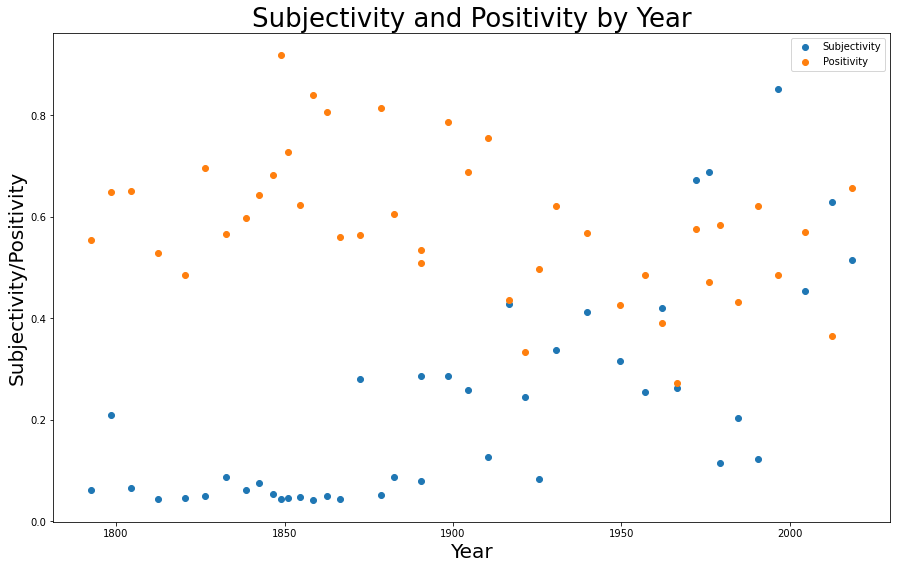

In [7]:
# Plotting mean values per president

plt.figure(figsize = (15, 9))
plt.scatter(sotu_mean_presidents['Year'], sotu_mean_presidents['is_subjective_preds'], label = 'Subjectivity')
plt.scatter(sotu_mean_presidents['Year'], sotu_mean_presidents['is_positive_preds'], label = 'Positivity')
plt.xlabel('Year', size = 20)
plt.ylabel('Subjectivity/Positivity', size = 20)
plt.title('Subjectivity and Positivity by Year', size = 26)
plt.legend();

In [8]:
sotu_mean_presidents.corr()

,Year,is_subjective_preds,is_positive_preds
Year,1.000000,0.724351,-0.428253
is_subjective_preds,0.724351,1.000000,-0.428753
is_positive_preds,-0.428253,-0.428753,1.000000


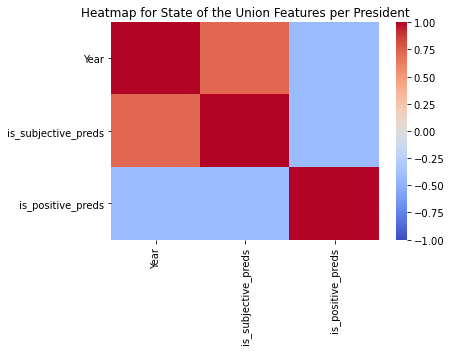

In [9]:
sns.heatmap(sotu_mean_presidents.corr(), 
            cmap = 'coolwarm',
            vmin = -1,
            vmax =1)
plt.title('Heatmap for State of the Union Features per President');

## Inaugural Addresses

In [10]:
# Converting date column to integer years for averaging

inaug['Date'] = pd.to_datetime(inaug['Date']).dt.year.astype(int)

In [11]:
# grouping by president and taking means for analysis

inaug_mean_presidents = inaug[['Name', 'Date', 'is_subjective_preds', 'is_positive_preds']].groupby('Name').mean()

In [12]:
inaug_mean_presidents.head()

,Date,is_subjective_preds,is_positive_preds
Name,,,
Abraham Lincoln,1863,0.070345,0.213802
Andrew Jackson,1831,0.082619,0.246266
Barack Obama,2011,0.554895,0.473331
Benjamin Harrison,1889,0.093911,0.162900
Bill Clinton,1995,0.242811,0.580406


In [13]:
inaug_mean_presidents.sort_values('Date', inplace = True)

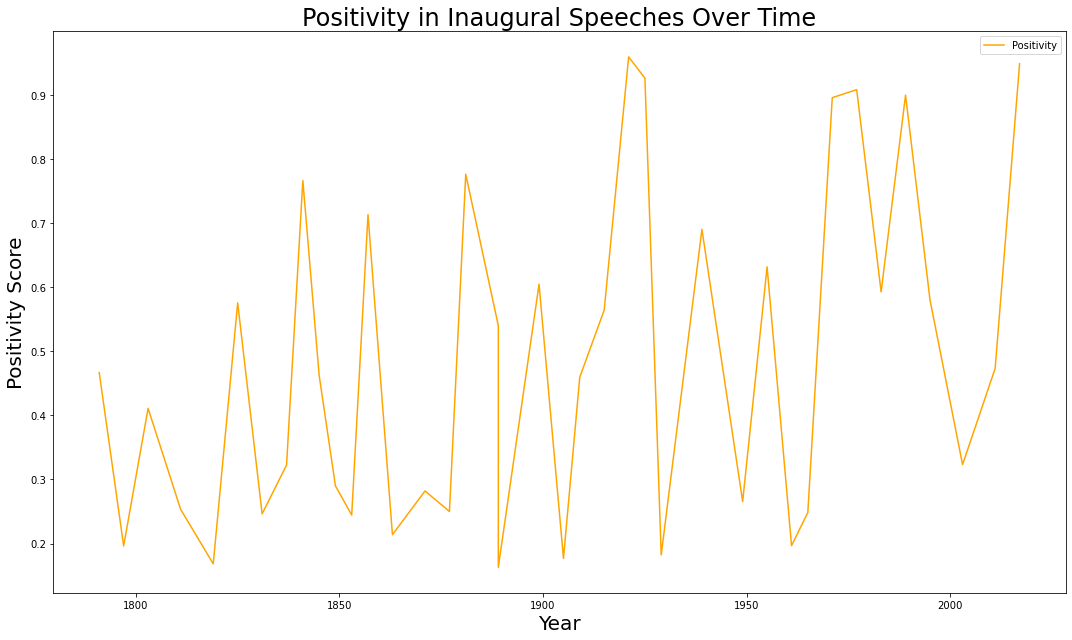

In [14]:
# Plotting averaged values per president over time

plt.figure(figsize = (15, 9))
plt.plot(inaug_mean_presidents['Date'], inaug_mean_presidents['is_positive_preds'], label = 'Positivity', color = 'orange')
plt.xlabel('Year', size =20)
plt.ylabel('Positivity Score', size =20)
plt.title('Positivity in Inaugural Speeches Over Time', size = 24)
plt.legend()
plt.tight_layout();

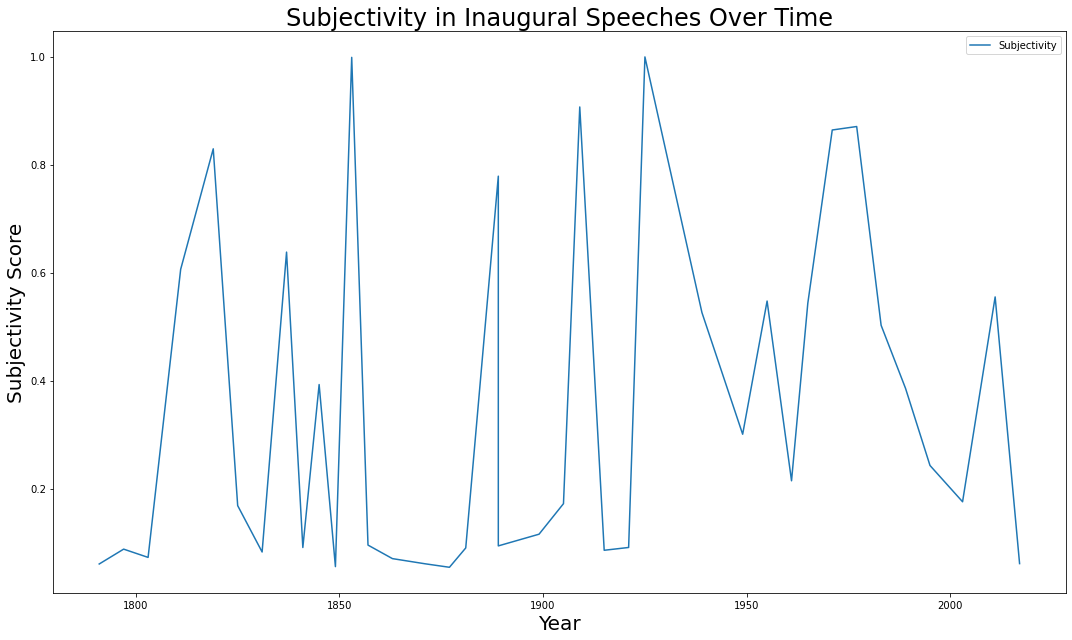

In [15]:
plt.figure(figsize = (15, 9))
plt.plot(inaug_mean_presidents['Date'], inaug_mean_presidents['is_subjective_preds'], label = 'Subjectivity')
plt.xlabel('Year', size =20)
plt.ylabel('Subjectivity Score', size =20)
plt.title('Subjectivity in Inaugural Speeches Over Time', size = 24)
plt.legend()
plt.tight_layout();

In [16]:
# Checking highest and lowest scorers on the positivity spectrum

inaug_mean_presidents[inaug_mean_presidents['is_positive_preds'] > 0.5]

,Date,is_subjective_preds,is_positive_preds
Name,,,
John Quincy Adams,1825,0.168466,0.575659
William Henry Harrison,1841,0.090926,0.766670
James Buchanan,1857,0.095404,0.713385
James A. Garfield,1881,0.090102,0.776520
Grover Cleveland,1889,0.778494,0.539915
William McKinley,1899,0.115571,0.604842
Woodrow Wilson,1915,0.085811,0.564377
Warren G. Harding,1921,0.090997,0.959597
Calvin Coolidge,1925,0.999284,0.926345


In [17]:
inaug_mean_presidents['is_positive_preds'].sort_values()[:10]

Name
Benjamin Harrison        0.162900
James Monroe             0.168299
Theodore Roosevelt       0.176767
Herbert Hoover           0.182203
John Adams               0.196262
John F. Kennedy          0.196684
Abraham Lincoln          0.213802
Franklin Pierce          0.244411
Andrew Jackson           0.246266
Lyndon Baines Johnson    0.248355
Name: is_positive_preds, dtype: float64

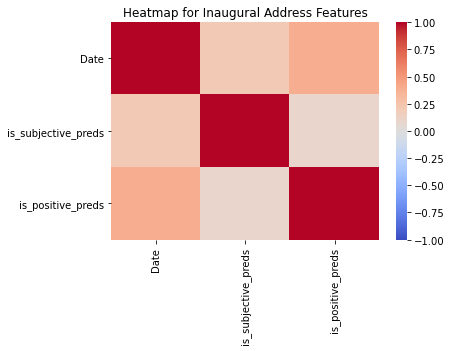

In [18]:
# plotting column correlations

sns.heatmap(inaug_mean_presidents.corr(), 
            cmap = 'coolwarm',
            vmin = -1,
            vmax =1)
plt.title('Heatmap for Inaugural Address Features');

## Department of Justice Press Releases

In [19]:
doj['date'] = pd.to_datetime(doj['date'], utc = True)

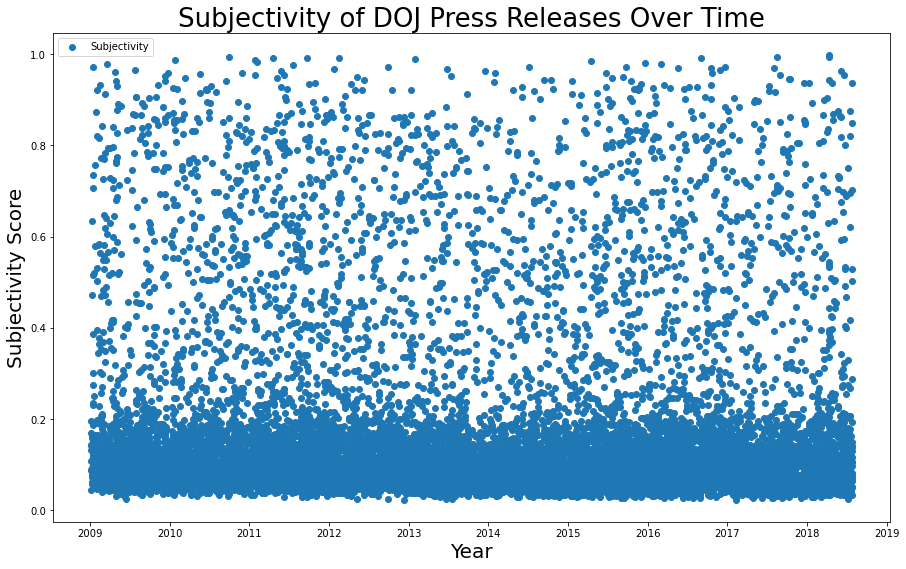

In [20]:
plt.figure(figsize = (15, 9))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) 
plt.scatter(doj['date'], doj['is_subjective_preds'], label = 'Subjectivity')
plt.xlabel('Year', size = 20)
plt.ylabel('Subjectivity Score', size = 20)
plt.xticks()
plt.title('Subjectivity of DOJ Press Releases Over Time', size = 26)
plt.legend();

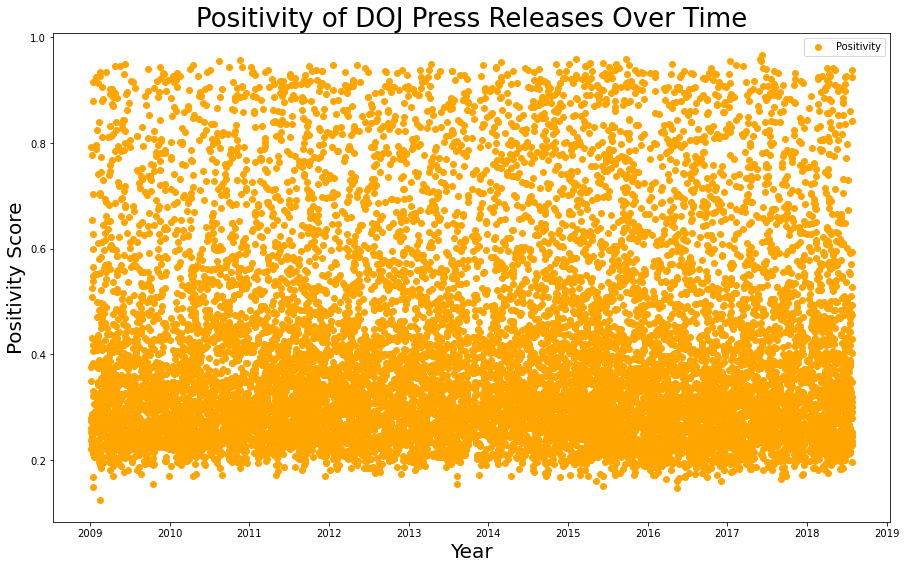

In [21]:
plt.figure(figsize = (15, 9))
# plt.scatter(doj['date'], doj['is_subjective_preds'], label = 'Subjectivity')
plt.scatter(doj['date'], doj['is_positive_preds'], label = 'Positivity', color = 'orange')
plt.xlabel('Year', size = 20)
plt.ylabel('Positivity Score', size = 20)
plt.title('Positivity of DOJ Press Releases Over Time', size = 26)
plt.legend();

In [22]:
# Converting datetime and plotting prediction values

doj['date'] = doj['date'].dt.year

In [23]:
# Grouping by year and plotting predicted values

doj_mean_date = doj[['date', 'is_subjective_preds', 'is_positive_preds']].groupby('date').mean()
doj_mean_date.reset_index(inplace = True)

In [24]:
doj_mean_date = doj_mean_date.sort_values('date')
doj_mean_date[:5]

,date,is_subjective_preds,is_positive_preds
0,2009,0.201858,0.402251
1,2010,0.204250,0.409471
2,2011,0.202327,0.406926
3,2012,0.183090,0.407457
4,2013,0.173648,0.415494


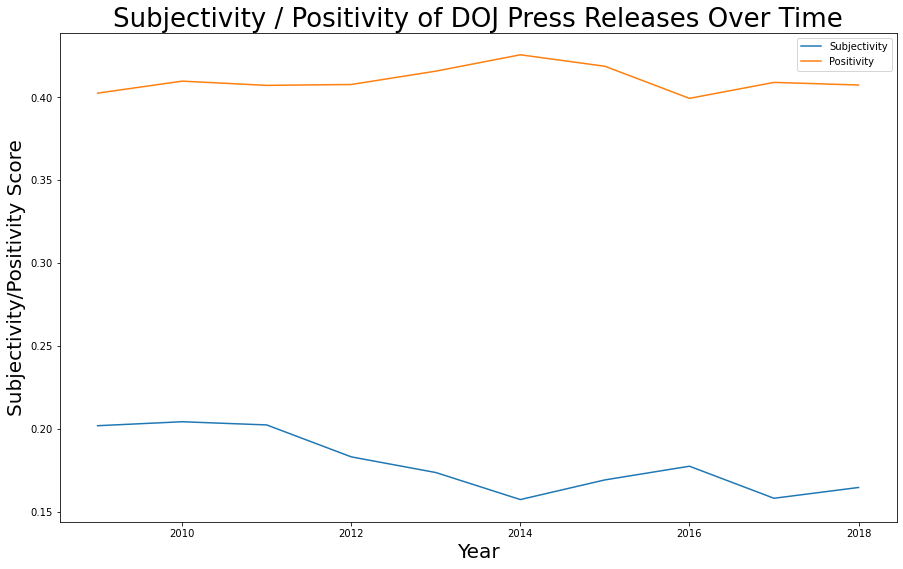

In [25]:
plt.figure(figsize = (15, 9))
plt.plot(doj_mean_date['date'], doj_mean_date['is_subjective_preds'], label = 'Subjectivity')
plt.plot(doj_mean_date['date'], doj_mean_date['is_positive_preds'], label = 'Positivity')
plt.xlabel('Year', size = 20)
plt.ylabel('Subjectivity/Positivity Score', size = 20)
plt.title('Subjectivity / Positivity of DOJ Press Releases Over Time', size = 26)
plt.legend();

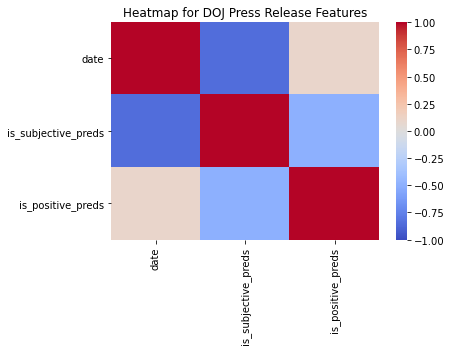

In [26]:
sns.heatmap(doj_mean_date.corr(), 
            cmap = 'coolwarm',
            vmin = -1,
            vmax =1)
plt.title('Heatmap for DOJ Press Release Features');

## Supreme Court Decisions

In [27]:
# Connverting to datetime and plotting predicted values

court['date_filed'] = pd.to_datetime(court['date_filed'], utc = True)

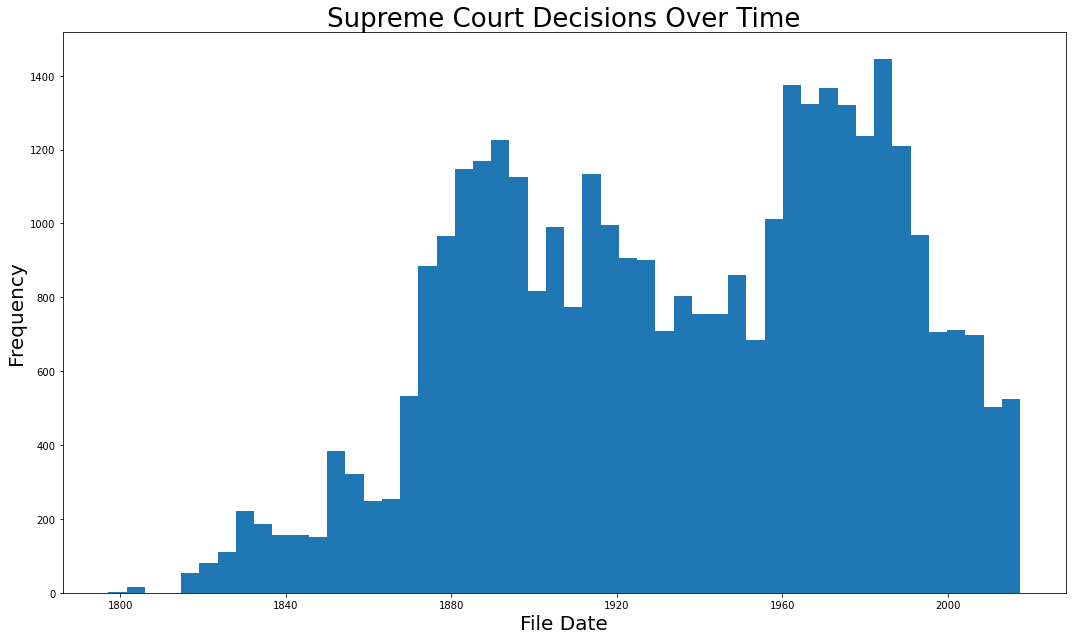

In [28]:
plt.figure(figsize=(15, 9))
plt.hist(court['date_filed'], bins = 50)
plt.title('Supreme Court Decisions Over Time', size = 26)
plt.ylabel('Frequency', size = 20)
plt.xlabel('File Date', size = 20)
plt.tight_layout();

In [29]:
# Getting averages per court justice and plotting positivity vs negativity

court_mean_justices = court[['scdb_decision_direction', 'scdb_votes_majority', 'scdb_votes_minority', 'author_name', 'is_subjective_preds', 'is_positive_preds']].groupby('author_name').mean()

In [30]:
court_mean_justices = court_mean_justices.sort_values('author_name')
court_mean_justices[:5]

,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,is_subjective_preds,is_positive_preds
author_name,,,,,
justice (with,1.0,6.0,2.0,0.978884,0.235171
justice *458,1.0,8.0,0.0,0.841685,0.377824
justice *duvall,NaN,NaN,NaN,0.087066,0.376599
justice *johnson,NaN,NaN,NaN,0.108629,0.185966
justice [[author]]ginsburg[[/author]],2.0,7.0,2.0,0.052618,0.269253


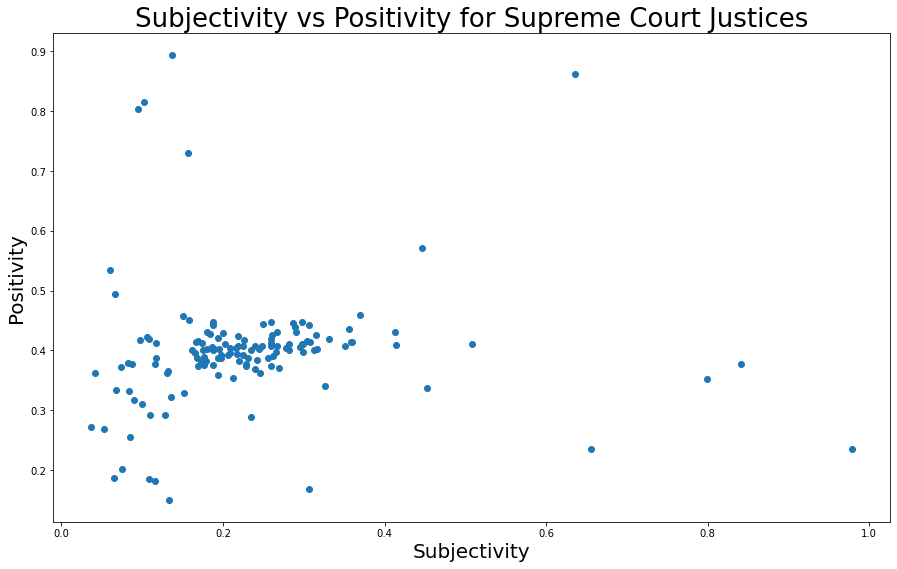

In [31]:
plt.figure(figsize = (15, 9))
plt.xlabel('Subjectivity', size=20)
plt.ylabel('Positivity', size=20)
plt.title('Subjectivity vs Positivity for Supreme Court Justices', size=26)
plt.scatter(court_mean_justices['is_subjective_preds'], court_mean_justices['is_positive_preds']);

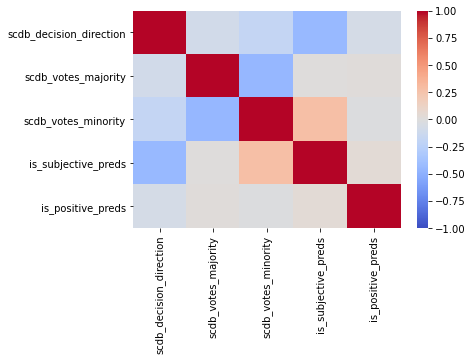

In [32]:
sns.heatmap(court_mean_justices.corr(), 
            cmap = 'coolwarm',
            vmin = -1,
            vmax =1);

In [33]:
# Checking plot outliers from above and removing justices who only have 1 case

court_mean_justices[court_mean_justices['is_subjective_preds'] > 0.3]

,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,is_subjective_preds,is_positive_preds
author_name,,,,,
justice (with,1.000000,6.000000,2.000000,0.978884,0.235171
justice *458,1.000000,8.000000,0.000000,0.841685,0.377824
justice blackmun,1.482389,6.721286,2.042879,0.412651,0.430171
justice branders,1.000000,8.000000,0.000000,0.655713,0.234473
justice brennan,1.457537,6.563694,2.141189,0.315608,0.425614
justice breyer,1.452174,6.753623,2.118841,0.312719,0.401457
justice burger,1.537170,6.973621,1.712230,0.351642,0.408178
justice concurring,2.000000,8.000000,1.000000,0.635932,0.861252
justice douglas,1.509191,6.681985,1.818015,0.315949,0.402921


In [34]:
justice_counts = pd.DataFrame(court.groupby('author_name')['author_name'].count())

In [35]:
justice_counts = justice_counts.rename(columns = {'author_name' : 'count'}).reset_index()

In [36]:
justice_counts.shape

(136, 2)

In [37]:
multiple_decision_judges = justice_counts[justice_counts['count'] != 1].author_name

In [38]:
multiple_decisions = court[[x in list(multiple_decision_judges) for x in court['author_name']]]

In [39]:
# Getting mean scores per judge who has more than 1 decision and replotting

multiple_decisions_mean_judges = multiple_decisions[['author_name', 'is_subjective_preds', 'is_positive_preds']].groupby('author_name').mean()

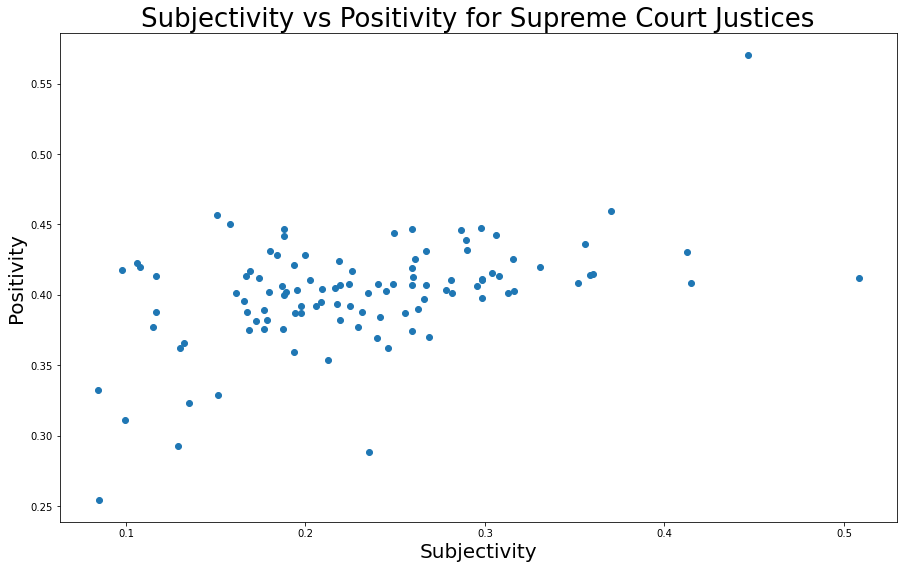

In [40]:
plt.figure(figsize = (15, 9))
plt.xlabel('Subjectivity', size=20)
plt.ylabel('Positivity', size=20)
plt.title('Subjectivity vs Positivity for Supreme Court Justices', size=26)
plt.scatter(multiple_decisions_mean_judges['is_subjective_preds'], multiple_decisions_mean_judges['is_positive_preds']);

In [41]:
print(multiple_decisions_mean_judges[multiple_decisions_mean_judges['is_subjective_preds'] > 0.55])
print(multiple_decisions_mean_judges[multiple_decisions_mean_judges['is_positive_preds'] > 0.7])

Empty DataFrame
Columns: [is_subjective_preds, is_positive_preds]
Index: []
Empty DataFrame
Columns: [is_subjective_preds, is_positive_preds]
Index: []


In [42]:
# converting to datetime year and grouping on year means

court['date_filed'] = court['date_filed'].dt.year.astype(int)
court_mean_year = court[['scdb_decision_direction', 'scdb_votes_majority', 'scdb_votes_minority', 'date_filed', 'is_subjective_preds', 'is_positive_preds']].groupby('date_filed').mean()

In [43]:
court_mean_year.reset_index(inplace = True)

In [44]:
court_mean_year = court_mean_year.sort_values('date_filed')
court_mean_year[:5]

,date_filed,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,is_subjective_preds,is_positive_preds
0,1797,2.000,6.00,0.0,0.102270,0.814964
1,1801,2.000,6.00,0.0,0.108270,0.384444
2,1803,2.375,5.75,0.0,0.131162,0.322632
3,1804,2.000,4.00,0.0,0.131599,0.371318
4,1805,2.000,4.00,0.0,0.078250,0.250175


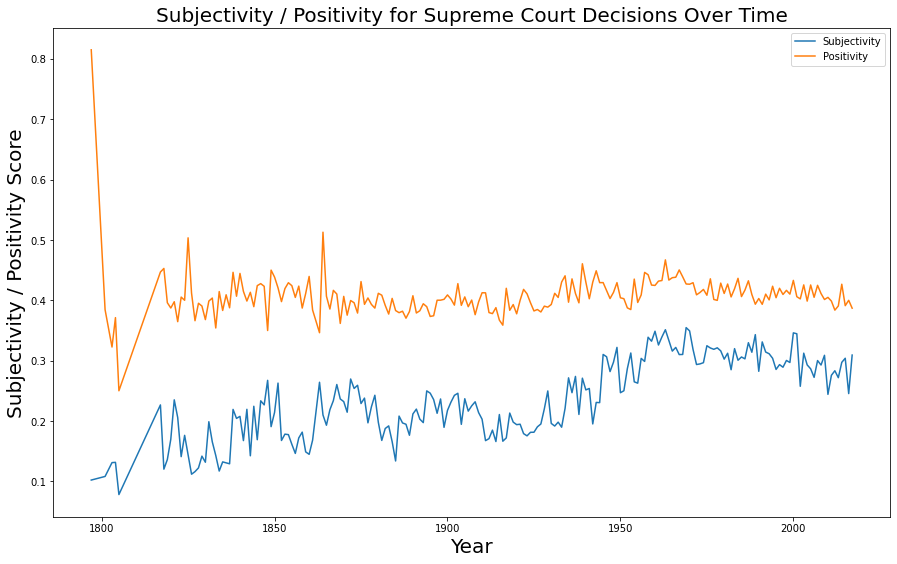

In [45]:
# plotting scores per year

plt.figure(figsize = (15, 9))
plt.xlabel('Year', size = 20)
plt.ylabel('Subjectivity / Positivity Score', size = 20)
plt.title('Subjectivity / Positivity for Supreme Court Decisions Over Time', size = 20)
plt.plot(court_mean_year['date_filed'], court_mean_year['is_subjective_preds'], label = 'Subjectivity')
plt.plot(court_mean_year['date_filed'], court_mean_year['is_positive_preds'], label = 'Positivity')
plt.legend();

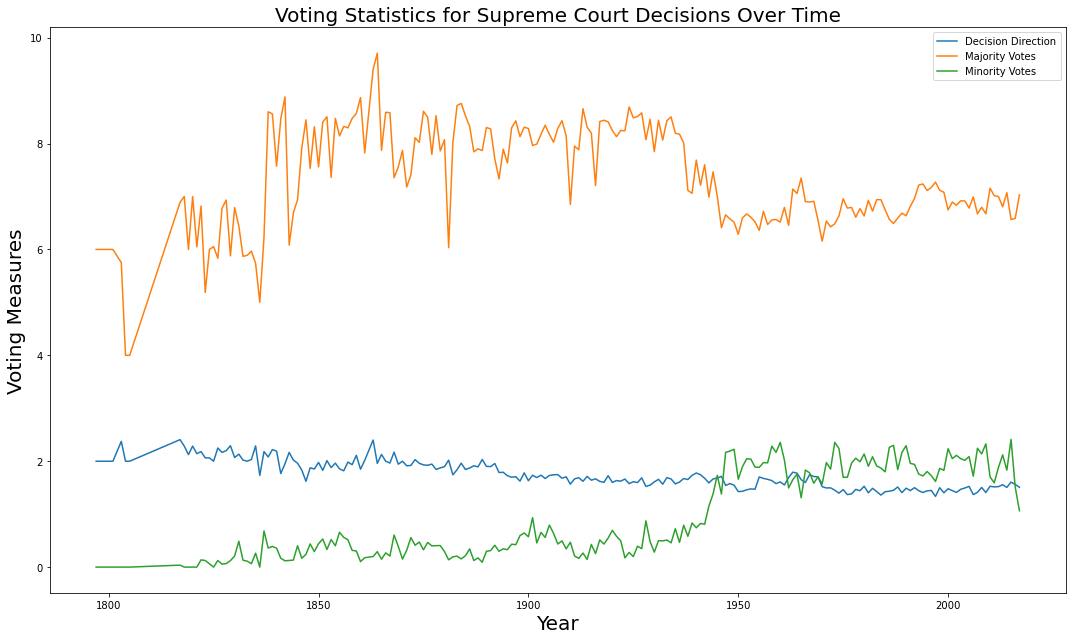

In [46]:
# plotting voting statistics

plt.figure(figsize = (15, 9))
plt.xlabel('Year', size = 20)
plt.ylabel('Voting Measures', size = 20)
plt.title('Voting Statistics for Supreme Court Decisions Over Time', size = 20)
plt.plot(court_mean_year['date_filed'], court_mean_year['scdb_decision_direction'], label = 'Decision Direction')
plt.plot(court_mean_year['date_filed'], court_mean_year['scdb_votes_majority'], label = 'Majority Votes')
plt.plot(court_mean_year['date_filed'], court_mean_year['scdb_votes_minority'], label = 'Minority Votes')
plt.legend()
plt.tight_layout();

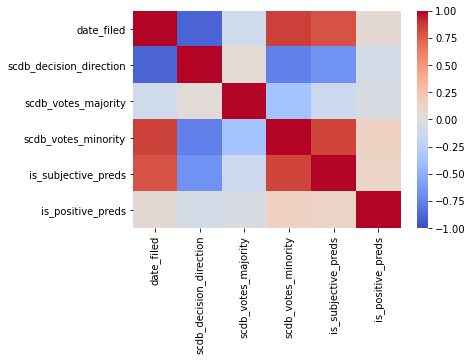

In [47]:
sns.heatmap(court_mean_year.corr(),
            cmap = 'coolwarm',
            vmin = -1,
            vmax =1);

## Combined

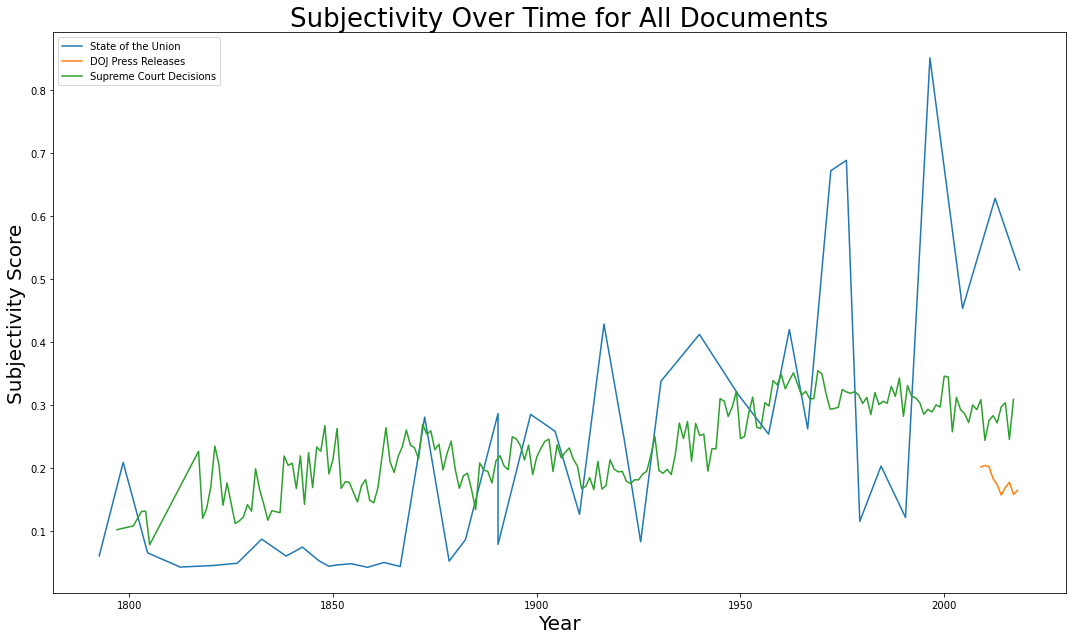

In [48]:
# plotting combined sentiment and subjectivity graphs with all documents present

plt.figure(figsize = (15, 9))
plt.plot(sotu_mean_presidents['Year'], sotu_mean_presidents['is_subjective_preds'], label = 'State of the Union')
# plt.plot(inaug_mean_presidents['Date'], inaug_mean_presidents['is_subjective_preds'], label = 'Inaugural Addresses')
plt.plot(doj_mean_date['date'], doj_mean_date['is_subjective_preds'], label = 'DOJ Press Releases')
plt.plot(court_mean_year['date_filed'], court_mean_year['is_subjective_preds'], label = 'Supreme Court Decisions')
plt.xlabel('Year', size = 20)
plt.ylabel('Subjectivity Score', size = 20)
plt.xticks()
plt.title('Subjectivity Over Time for All Documents', size = 26)
plt.legend()
plt.tight_layout();

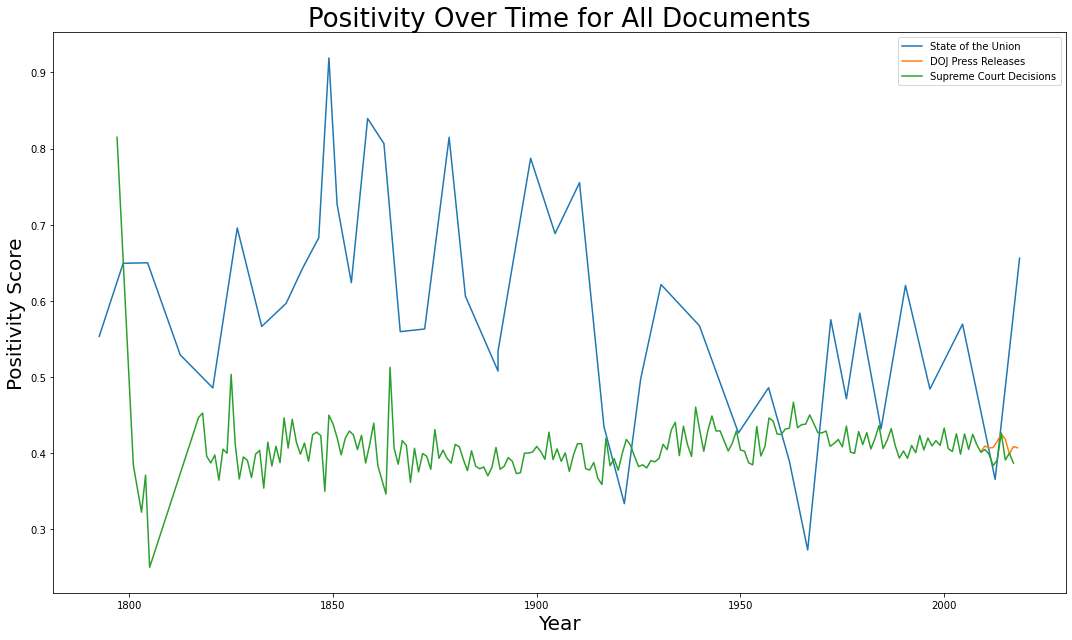

In [49]:
plt.figure(figsize = (15, 9))
plt.plot(sotu_mean_presidents['Year'], sotu_mean_presidents['is_positive_preds'], label = 'State of the Union')
# plt.plot(inaug_mean_presidents['Date'], inaug_mean_presidents['is_positive_preds'], label = 'Inaugural Addresses')
plt.plot(doj_mean_date['date'], doj_mean_date['is_positive_preds'], label = 'DOJ Press Releases')
plt.plot(court_mean_year['date_filed'], court_mean_year['is_positive_preds'], label = 'Supreme Court Decisions')
plt.xlabel('Year', size = 20)
plt.ylabel('Positivity Score', size = 20)
plt.title('Positivity Over Time for All Documents', size = 26)
plt.legend()
plt.tight_layout();